In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/02


Extracting a signal from two datasets.
---
Below we simulate two experiments.

Experiment1:
- has a gaussian signal
- and a falling background that goes as $exp^{-x/\lambda}$

Experinemt2:
- has the same gaussian signal component
- and a background that goes as $x^n$, where $n$<0

In [10]:
from random import random

tfsig=r.TF1("tfsig","exp(-0.5*(x-[0])*(x-[0])/[1]/[1])",25,125)
tfsig.SetParameters(75,4.5)

def experiment1():
    S_over_N = 0.08
    ndata=2700
    lam=20
    range=(30,100)
    background = r.TF1("back1","exp(-x/[0])",range[0],range[1])
    background.SetParameter(0,lam)
    hist = r.TH1F("hexp1","Experiment1;x;frequency",50,range[0],range[1])
    nsig=int(ndata*S_over_N)
    nbkg=ndata-nsig
    hist.FillRandom("tfsig",nsig)
    hist.FillRandom("back1",nbkg)
    return hist

def experiment2():
    S_over_N = 0.12
    ndata=2500   
    n=-2.2
    range=(50,100)
    background = r.TF1("back2","pow(x,[0])",range[0],range[1])
    background.SetParameter(0,n)
    hist = r.TH1F("hexp2","Experiment2;x;frequency",50,range[0],range[1])
    nsig=int(ndata*S_over_N)
    nbkg=ndata-nsig
    hist.FillRandom("tfsig",nsig)
    hist.FillRandom("back2",nbkg)
    return hist

Here we run the two experiments and get the results.  We will interpret these as follows:

- The experiments are independent
- They measure the same signal process
- They have different backgrounds to the signal measurement

Warning in <TROOT::Append>: Replacing existing TH1: hexp1 (Potential memory leak).


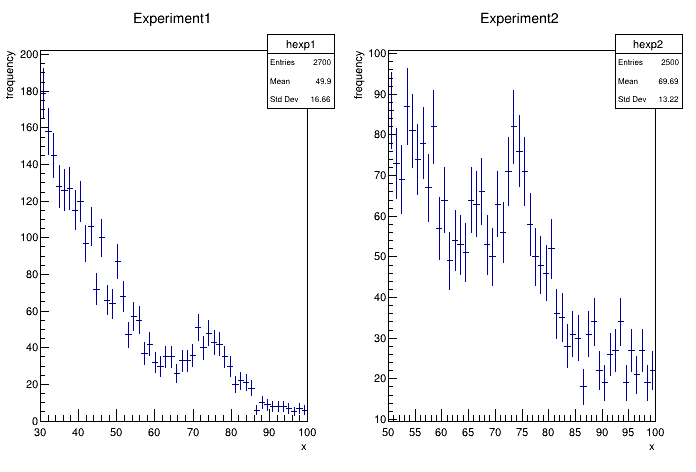

In [11]:
tc=r.TCanvas()
tc.Divide(2,1)
h1=experiment1()
h2=experiment2()
tc.cd(1)
h1.Draw("e")
tc.cd(2)
h2.Draw("e")
tc.Draw()

Here we save the results of the experiments:

In [12]:
tf=r.TFile("experiments.root","recreate")
h1.Write()
h2.Write()
tf.Close()

And here's an example of reading them back from the TFile

Below we use DrawCopy instead of Draw, so we can clsoe the file (which deletes the histogram from memory) without deleting the drawing.

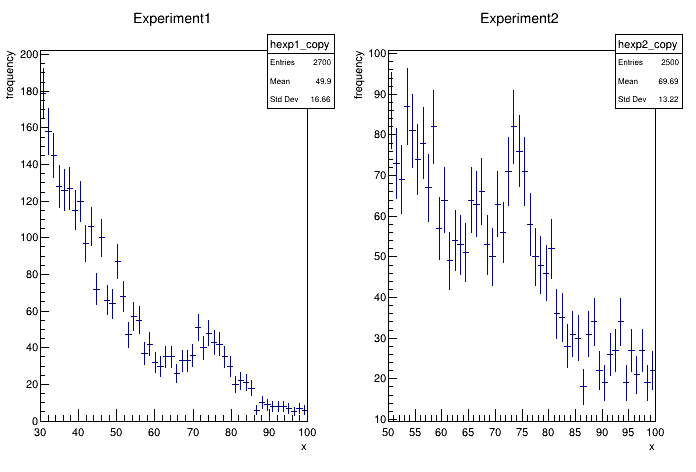

In [13]:
tf=r.TFile("experiments.root")
h1=tf.Get("hexp1")
h2=tf.Get("hexp2")
tc.cd(1)
h1.DrawCopy("e")
tc.cd(2)
h2.DrawCopy("e")
tc.Draw()
tf.Close()

You job for this project will be to develop a simultaneous fit for the two histograms using minuit.  See this week's exercise description for more details.